In [16]:
%load_ext autoreload
%autoreload 2

import pickle
import seaborn as sns
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
def plot_voltage_diff_only_L2(l2_diff_control, l2_diff_energy, element):
    fig, ax = plt.subplots(1, 1, dpi=200)
    # _,bins2,_ = ax.hist(l2_diff_control.flatten(),bins=10,weights=[100/len(l2_diff_control.flatten())]*len(l2_diff_control.flatten()),label='Control')
    # ax.hist(l2_diff_energy.flatten(),bins=10,weights=[100/len(l2_diff_energy.flatten())]*len(l2_diff_energy.flatten()),alpha=0.5,label='Energy')
    # use static bins
    palette = sns.color_palette("colorblind")
    pastel_blue = palette[0]
    pastel_orange = palette[1]

    _, bins2, _ = ax.hist(
        l2_diff_control.flatten(),
        bins=[-0.05, -0.04, -0.03, -0.02, -0.01, 0, 0.01, 0.02, 0.03, 0.04, 0.05],
        weights=[100 / len(l2_diff_control.flatten())] * len(l2_diff_control.flatten()),
        alpha=0.5,
        color=pastel_blue,
        label="Control",
    )
    ax.hist(
        l2_diff_energy.flatten(),
        bins=[-0.05, -0.04, -0.03, -0.02, -0.01, 0, 0.01, 0.02, 0.03, 0.04, 0.05],
        weights=[100 / len(l2_diff_energy.flatten())] * len(l2_diff_energy.flatten()),
        alpha=0.5,
        color=pastel_orange,
        label="Energy",
    )

    ax.spines[["right", "top"]].set_visible(False)

    plt.legend(fontsize=20)
    plt.ylabel("Percentage", fontsize=20)
    plt.xlabel("MSD", fontsize=15)
    plt.title("L2 {}".format(element), fontsize=20)
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=17)
    plt.savefig("./mismatch.png", bbox_inches="tight")

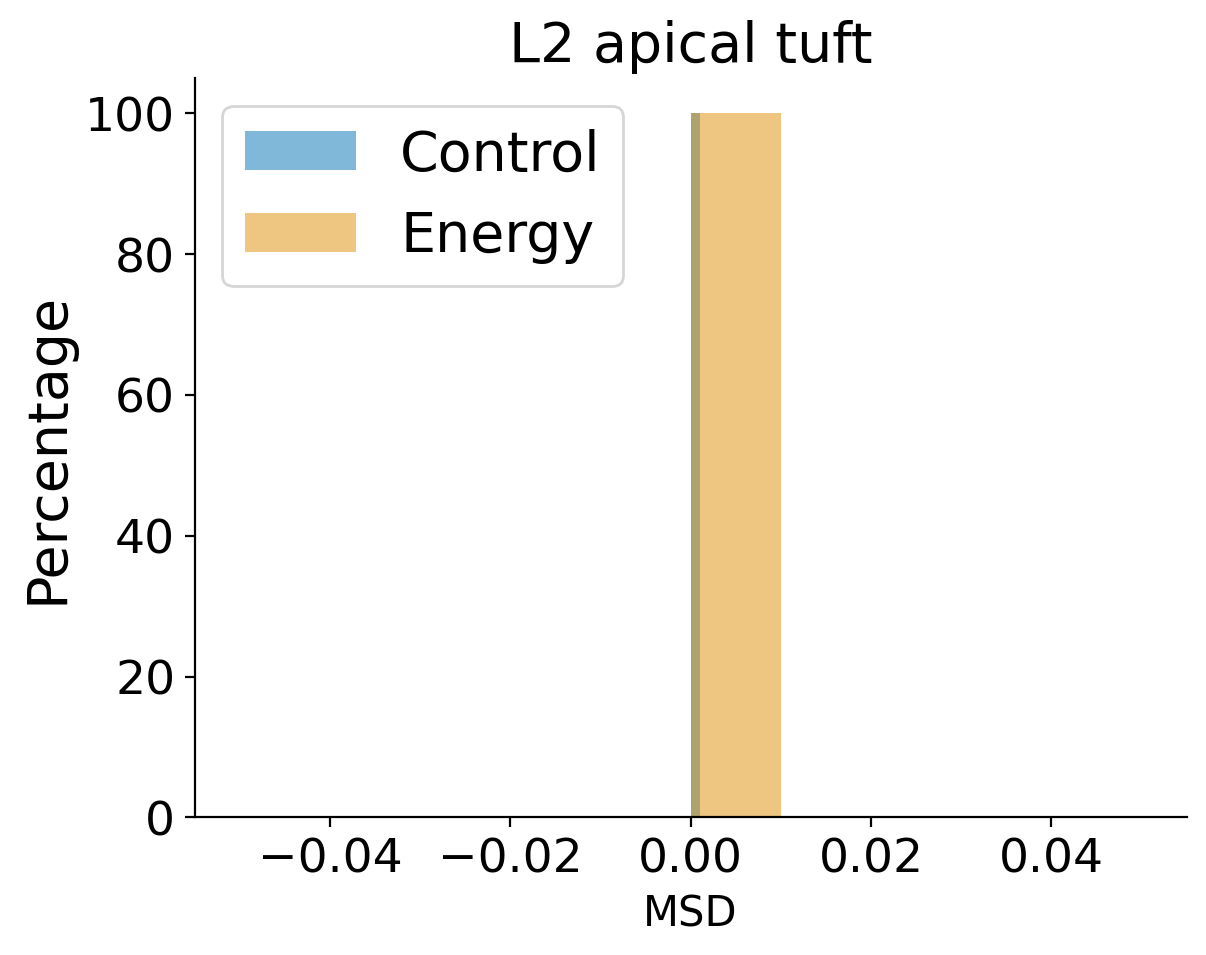

In [20]:
with open("./checkpoints/mismatch/l_clamp_diff_E.p", "rb") as f:
    l_clamp_diff_E = pickle.load(f)

with open("./checkpoints/mismatch/l_clamp_diff_NE.p", "rb") as f:
    l_clamp_diff_NE = pickle.load(f)

plot_voltage_diff_only_L2(l_clamp_diff_NE[1], l_clamp_diff_E[1], "apical tuft")
